In [76]:
!pip install librosa


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
filename = r"D:\audio_data\22601-8-0-46.wav"

In [79]:
import IPython.display as ipd
import librosa
import librosa.display

In [80]:
plt.figure(figsize=(14,5))
librosa_audio_data, librosa_sample_rate = librosa.load(filename)
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
ipd.Audio(filename)
# plt.show()


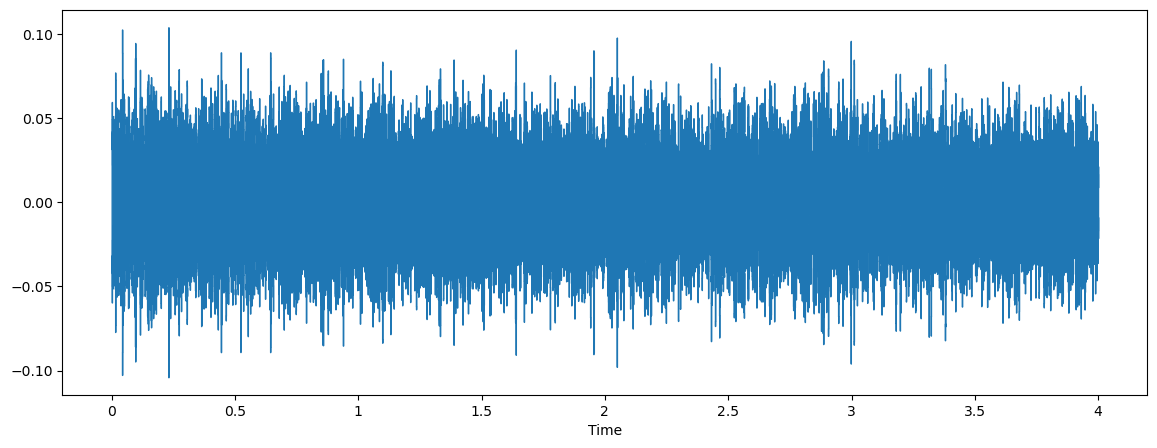

In [81]:
plt.show()


In [82]:
sample_rate

22050

In [83]:
librosa_audio_data

array([ 0.02622907,  0.04102333,  0.03046753, ..., -0.02127981,
       -0.0181955 , -0.01770725], dtype=float32)

In [84]:
import pandas as pd

metadata = pd.read_csv(r"D:\audio_data\UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [85]:
## checking weather the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [86]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [87]:
 mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [88]:
mfccs

array([[-295.71213   , -274.37296   , -271.6068    , ..., -274.41235   ,
        -270.60477   , -285.87427   ],
       [ 142.07765   ,  160.27713   ,  166.74591   , ...,  164.28345   ,
         160.47351   ,  152.48227   ],
       [ -26.65421   ,  -34.494293  ,  -37.614918  , ...,  -39.76367   ,
         -34.522358  ,  -22.096348  ],
       ...,
       [  -0.51935554,   -6.380352  ,   -4.486059  , ...,   -1.1930342 ,
          -4.825769  ,   -6.5340877 ],
       [  -3.8967988 ,   -5.018197  ,   -3.3024445 , ...,  -10.127256  ,
          -6.050715  ,   -5.5844927 ],
       [  -4.2207985 ,   -1.1564498 ,    3.5406938 , ...,    0.77550244,
           2.881665  ,    3.1859863 ]], dtype=float32)

In [89]:
import pandas as pd 
import os
import librosa

audio_dataset_path = r"D:\audio_data\all_fold"
metadata = pd.read_csv(r"D:\audio_data\UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [108]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='scipy')  
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)  
    
    return mfccs_scaled_features

In [95]:
!pip install resampy


In [109]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    # print(data)
    extracted_features.append([data,final_class_labels])


3553it [01:24, 39.40it/s]E:\New folder\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  
8324it [03:24, 46.65it/s]E:\New folder\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  
E:\New folder\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  
8732it [03:34, 40.62it/s]


In [110]:

### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-211.01833, 61.279896, -121.51646, -62.041412...",dog_bark
1,"[-415.5431, 97.27049, -40.93115, 49.012497, 11...",children_playing
2,"[-450.98102, 110.367256, -35.585976, 41.206604...",children_playing
3,"[-405.06644, 89.19861, -23.04718, 40.789795, 1...",children_playing
4,"[-438.15134, 101.76034, -40.557262, 48.588905,...",children_playing


In [124]:

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [123]:
X.shape

(8732, 40)

In [128]:
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [129]:
y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [130]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [131]:
X_train


array([[-1.2328963e+02,  1.0147972e+02, -1.1627333e+01, ...,
         3.3605154e+00, -1.5666603e+00,  3.0260170e+00],
       [-3.7070856e+00,  7.7021805e+01,  6.1879225e+00, ...,
        -5.0066466e+00, -3.6462286e+00, -3.0752208e+00],
       [-3.9050232e+01, -1.5010292e+01, -5.3120437e+00, ...,
         5.6984991e-01,  5.3230667e-01,  1.5158817e+00],
       ...,
       [-4.2647723e+02,  9.1308289e+01,  4.4419560e+00, ...,
         8.0603766e-01,  6.8002886e-01,  7.5394481e-01],
       [-1.3595062e+02,  1.2242846e+02, -1.9760836e+01, ...,
        -8.4937826e-02, -5.8458382e-01, -2.1883221e+00],
       [-4.1780762e+02,  2.0604321e+02,  8.0441856e+00, ...,
        -4.4749050e+00, -4.2405195e+00, -7.4616045e-01]], dtype=float32)

In [132]:
X_train.shape


(6985, 40)

In [133]:
X_test.shape


(1747, 40)

In [134]:
y_train.shape


(6985, 10)

In [135]:
y_test.shape


(1747, 10)

In [136]:
## Model Creation

import tensorflow as tf
print(tf.__version__)

2.18.0


In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [138]:
### No of classes
num_labels=y.shape[1]


In [145]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [149]:
model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1075 - loss: 19.1928
Epoch 1: val_loss improved from inf to 2.29516, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1076 - loss: 19.1488 - val_accuracy: 0.1162 - val_loss: 2.2952
Epoch 2/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1119 - loss: 2.6488
Epoch 2: val_loss improved from 2.29516 to 2.28299, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1125 - loss: 2.6329 - val_accuracy: 0.1156 - val_loss: 2.2830
Epoch 3/100
194/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1099 - loss: 2.3495
Epoch 3: val_loss improved from 2.28299 to 2.27574, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1102 - loss: 2.3484 - val_accuracy: 0.1048 - val_loss: 2.2757
Epoch 4/100
207/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [147]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [151]:
## Trianing my model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
197/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7206 - loss: 0.8405
Epoch 1: val_loss improved from inf to 0.68407, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7204 - loss: 0.8414 - val_accuracy: 0.7853 - val_loss: 0.6841
Epoch 2/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7249 - loss: 0.8352
Epoch 2: val_loss did not improve from 0.68407
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.8359 - val_accuracy: 0.7865 - val_loss: 0.7129
Epoch 3/100
212/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.8633
Epoch 3: val_loss improved from 0.68407 to 0.67701, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 0.8636 - val_accuracy: 0.7968 - val_loss: 0.6770
Epoch 4/100
196/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - loss: 0.8363
Epoch 4: val_loss did not improve from 0.6

In [152]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7939324378967285
